In [413]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)



(78458, 11)


In [414]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
#df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [361]:
# #Labels
# import numpy as np
# # bins = [-1,0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,300,400,500,600,650,700,750,800,900,950,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,17500,20000,22500,
# #         25000,30000,35000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,120000,140000,160000,
# #         180000,200000,240000,300000,360000,np.inf]
# # names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
# #          38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
# bins = [-1,0.1,4,10,20,30,50,75,100,125,150,175,200,230,270,300,330,370,400,450,500,600,650,700,750,800,850,950,1000,1200,1400,1600,
#         1800,2000,2300,2700,3000,3500,4000,5000,6000,7000,8000,10000,15000,
#         20000,40000,60000,100000,np.inf]
# names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
#          38,39,40,41,42,43,44,45,46,47,48,49]
# df['Name_Label'] = pd.cut(df['Likes'], bins, labels=names)

# # #Pure Label Encoding
# # from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # # Converting Genre and Name to labelencoding
# # labelencoder = LabelEncoder()
# # df['Name_Label'] = labelencoder.fit_transform(df['Name'])
# # df.head()

In [415]:
df.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499.0,97.0,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49.0,17.0,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312.0,91.0,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,2400.0,76.0,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,3031.0,699.0,201030


In [365]:
#Labels
# df['Genre_Label'] = df['Genre'].map({'drumbass':1, 'deephouse':2,'metal':3, 'rock':4, 'electronic':5,
#                                      'latin':6, 'dubstep':7, 'danceedm':8, 'trap':9, 'country':10,
#                                      'pop':11, 'disco':12, 'classical':13, 'ambient':14, 'folksingersongwriter':15,
#                                      'rbsoul':16, 'alternativerock':17, 'reggaeton':18, 'indie':19, 'hiphoprap':20,'all-music':21})

In [366]:
#Get counts by Genre_Label bins
# df['Genre_Label'].value_counts()

8     22633
5     18331
21    10277
16     5411
6      4562
9      4055
4      4000
2      2423
11     1787
7      1100
14      847
13      767
1       671
3       523
12      374
10      336
17      156
20      100
18       55
15       39
19       11
Name: Genre_Label, dtype: int64

In [367]:
# df['Name_Label'] = df['Name_Label'].astype('int64')
# # df.isnull().sum()
# # df.describe()
# #df.dtypes
# # # print(df.head()

In [368]:
# # Distribution of features by Genre
# df_mean = df.groupby('Genre').mean()
# print(df_mean)

                         Unique_ID         Views    Comments         Likes  \
Genre                                                                        
all-music             7.993705e+05  2.451156e+06  294.354578  36251.202004   
alternativerock       7.715628e+05  8.545917e+05  190.173077  11453.076923   
ambient               1.104049e+06  3.985286e+05   87.917355   6400.989374   
classical             9.667382e+05  3.931904e+05   91.676662   7339.490222   
country               5.000266e+05  2.945058e+05  124.800595   5161.773810   
danceedm              7.098378e+05  2.667007e+05  114.792029   4879.496664   
deephouse             1.160870e+06  6.264949e+04   66.227404   1641.210070   
disco                 3.550900e+05  3.681520e+05   86.232620   6274.732620   
drumbass              5.862023e+05  3.712738e+04   67.277198   1334.828614   
dubstep               6.637812e+05  2.407431e+05  167.078182   5850.751818   
electronic            7.345176e+05  1.736503e+05   99.013965   3

In [429]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Genre','Country','Timestamp','Song_Name','Followers','Comments'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  Followers  
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0     119563  
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0       2141  
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0      22248  
3  2017-06-08 23:50:03.000

,Name,Views,Likes,Popularity
0,Hardstyle,14017,499.0,97.0
1,Dj Aladdin,1918,49.0,17.0
2,Maxximize On Air,9668,312.0,91.0
3,GR6 EXPLODE,113036,2400.0,76.0
4,Tritonal,110024,3031.0,699.0


In [445]:
df[df['Name']=='$𝑈𝐼𝐶𝐼𝐷𝐸𝐵𝑂𝑌$'].COUNT()

,Name,Views,Likes,Popularity


In [453]:
df.groupby(['Name']).mean().to_csv('Understanding_View_Likes_Popularity')

In [456]:
df[['Likes','Name']].groupby(['Name']).min().to_csv('Understanding_min_likes')

In [457]:
df[['Likes','Name']].groupby(['Name']).max().to_csv('Understanding_max_likes.csv')

In [454]:
df.groupby(['Name']).count().to_csv('Understanding_Number_Of_Videos.csv')

In [370]:
df.to_csv('Test_1.csv')
# df.drop(['Popularity'],inplace = True, axis = 1)

In [371]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity','Follow_Percent'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Follow_Percent','Views','Genre_Label'])
print(df.head())

      Likes  Popularity  Follow_Percent     Views  Genre_Label
0 -0.157700   -0.171261       -0.059852   14017.0          8.0
1 -0.166227   -0.187892        0.070172    1918.0          8.0
2 -0.161243   -0.172509       -0.052271    9668.0          8.0
3 -0.121678   -0.175627       -0.060319  113036.0         16.0
4 -0.109722   -0.046114       -0.053776  110024.0          8.0


In [372]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Converting Genre_Label and Name_Label to labelencoding
labelencoder = LabelEncoder()
genreoneHotEncoder = OneHotEncoder(categories='auto')
nameoneHotEncoder = OneHotEncoder(categories='auto')
genre_transformed_data = genreoneHotEncoder.fit_transform((df['Genre_Label'].values).reshape(-1,1))
genre_hashed_features = pd.DataFrame( genre_transformed_data.toarray()).add_prefix('gen_')
genre_hashed_features.head()

# oneHotEncoder = OneHotEncoder(categories='auto')
# name_transformed_data = nameoneHotEncoder.fit_transform((df['Name_Label'].values).reshape(-1,1))
# name_hashed_features = pd.DataFrame( name_transformed_data.toarray()).add_prefix('name_')
# name_hashed_features.head()

,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,gen_11,gen_12,gen_13,gen_14,gen_15,gen_16,gen_17,gen_18,gen_19,gen_20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
print(genre_hashed_features.shape)
# print(name_hashed_features.shape)

(78458, 21)


In [374]:
# df = df.join(name_hashed_features)
df = df.join(genre_hashed_features)
print(df.shape)
df['Likes'] = df['Likes'].apply(pd.to_numeric, errors='coerce')
# df['Popularity'] = df['Popularity'].apply(pd.to_numeric, errors='coerce')

(78458, 26)


In [375]:
# df = df[df['Likes'] <10 ]
# df = df[df['Popularity'] <10 ]

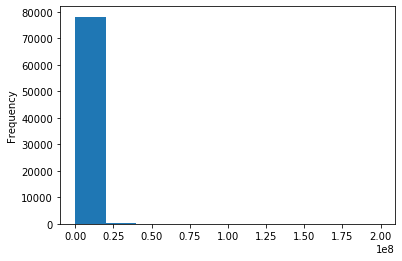

In [376]:
y = df['Views']
df.drop(['Views','Genre_Label'],inplace=True,axis=1)
y.plot.hist()

In [377]:
# df.plot.hist()

In [378]:
# df.isnull().sum()


In [379]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [380]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("RMSE - XGBoost regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


d:\applnsanaconda3\envs\hackathon\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:54:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.49945e+06
[1]	validation_0-rmse:3.18791e+06
[2]	validation_0-rmse:2.9255e+06
[3]	validation_0-rmse:2.67708e+06
[4]	validation_0-rmse:2.44818e+06
[5]	validation_0-rmse:2.25436e+06
[6]	validation_0-rmse:2.0808e+06
[7]	validation_0-rmse:1.92377e+06
[8]	validation_0-rmse:1.78549e+06
[9]	validation_0-rmse:1.66981e+06
[10]	validation_0-rmse:1.56861e+06
[11]	validation_0-rmse:1.48069e+06
[12]	validation_0-rmse:1.39755e+06
[13]	validation_0-rmse:1.32158e+06
[14]	validation_0-rmse:1.2613e+06
[15]	validation_0-rmse:1.20429e+06
[16]	validation_0-rmse:1.15446e+06
[17]	validation_0-rmse:1.11115e+06
[18]	validation_0-rmse:1.0745e+06
[19]	validation_0-rmse:1.04565e+06
[20]	validation_0-rmse:1.01897e+06
[21]	validation_0-rmse:995150
[22]	validation_0-rmse:975655
[23]	validation_0-rmse:957899
[24]	validation_0-rmse:94

In [381]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  890003.3635180685


In [397]:
import pandas as pd
# In[83]:
df = pd.read_csv('Data_Test.csv')
df.head(10)
print(df.shape)

(19615, 10)


In [398]:
#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)

In [384]:
df.to_csv('Data_Test_Transformed.csv')

In [399]:
#df.dtypes
df['Likes'] = df['Likes'].astype('float64')
df['Popularity'] = df['Popularity'].astype('float64')
df['Follow_Percent'] = df['Comments'] / df['Followers']

In [386]:
# #Labels
# import numpy as np
# # bins = [-1,0,10,20,30,40,50,60,70,80,90,100,125,150,175,200,300,400,500,600,650,700,750,800,900,950,1000,1500,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,17500,20000,22500,
# #         25000,30000,35000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000,120000,140000,160000,
# #         180000,200000,240000,300000,360000,np.inf]
# # names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
# # #          38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64]
# # bins = [-1,0.1,4,10,20,30,50,75,100,125,150,175,200,230,270,300,330,370,400,450,500,600,650,700,750,800,850,950,1000,1200,1400,1600,
# #         1800,2000,2300,2700,3000,3500,4000,5000,6000,7000,8000,10000,15000,
# #         20000,40000,60000,100000,np.inf]
# # names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
# #          38,39,40,41,42,43,44,45,46,47,48,49]
# bins = [-1,50,100,300,500,1000,2500,4000,10000,np.inf]
# names = [1,2,3,4,5,6,7,8,9]

# df['Name_Label'] = pd.cut(df['Likes'], bins, labels=names)

In [400]:
#Labels
df['Genre_Label'] = df['Genre'].map({'drumbass':1, 'deephouse':2,'metal':3, 'rock':4, 'electronic':5,
                                     'latin':6, 'dubstep':7, 'danceedm':8, 'trap':9, 'country':10,
                                     'pop':11, 'disco':12, 'classical':13, 'ambient':14, 'folksingersongwriter':15,
                                     'rbsoul':16, 'alternativerock':17, 'reggaeton':18, 'indie':19, 'hiphoprap':20,'all-music':21})

In [401]:
#Correlation matrix
df.drop(['Unique_ID','Name','Genre','Country','Timestamp','Song_Name','Followers','Comments'],inplace = True, axis = 1)

In [402]:
df = pd.DataFrame(df)
df.head()

,Likes,Popularity,Follow_Percent,Genre_Label
0,5428.0,118.0,0.010125,21
1,738.0,195.0,0.000116,8
2,386.0,96.0,0.000611,8
3,388.0,19.0,0.000001,21
4,79.0,1.0,0.000000,4


In [405]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()

ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity','Follow_Percent'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Follow_Percent','Genre_Label'])


print(df.head())

      Likes  Popularity  Follow_Percent  Genre_Label
0 -0.068006   -0.166740        0.075937         21.0
1 -0.158250   -0.151475       -0.056263          8.0
2 -0.165023   -0.171102       -0.049716          8.0
3 -0.164984   -0.186368       -0.057774         21.0
4 -0.170930   -0.189936       -0.057790          4.0


In [406]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # Converting Genre_Label and Name_Label to labelencoding
# labelencoder = LabelEncoder()
# genreoneHotEncoder = OneHotEncoder(categories='auto')
# nameoneHotEncoder = OneHotEncoder(categories='auto')
genre_transformed_data = genreoneHotEncoder.transform((df['Genre_Label'].values).reshape(-1,1))
genre_hashed_features = pd.DataFrame( genre_transformed_data.toarray()).add_prefix('gen_')
genre_hashed_features.head()

# # oneHotEncoder = OneHotEncoder(categories='auto')
# name_transformed_data = nameoneHotEncoder.transform((df['Name_Label'].values).reshape(-1,1))
# name_hashed_features = pd.DataFrame( name_transformed_data.toarray()).add_prefix('name_')
# name_hashed_features.head()

,gen_0,gen_1,gen_2,gen_3,gen_4,gen_5,gen_6,gen_7,gen_8,gen_9,...,gen_11,gen_12,gen_13,gen_14,gen_15,gen_16,gen_17,gen_18,gen_19,gen_20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [407]:
print(genre_hashed_features.shape)
# print(name_hashed_features.shape)

(19615, 21)


In [408]:
# df = df.join(name_hashed_features)
df = df.join(genre_hashed_features)
print(df.shape)
df['Likes'] = df['Likes'].apply(pd.to_numeric, errors='coerce')
# df['Popularity'] = df['Popularity'].apply(pd.to_numeric, errors='coerce')

(19615, 25)


In [409]:
df.drop(['Genre_Label'],inplace=True,axis=1)

In [410]:
df.isnull().sum()


Likes             0
Popularity        0
Follow_Percent    0
gen_0             0
gen_1             0
gen_2             0
gen_3             0
gen_4             0
gen_5             0
gen_6             0
gen_7             0
gen_8             0
gen_9             0
gen_10            0
gen_11            0
gen_12            0
gen_13            0
gen_14            0
gen_15            0
gen_16            0
gen_17            0
gen_18            0
gen_19            0
gen_20            0
dtype: int64

In [412]:
# calculate the auc score
y_pred_1 = xlf.predict(df)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_1.to_csv('Data_Test_Predicted_OneHotEncode_Genre_Comments_Linear_Regression.csv',sep='#')